## MOUNT DRIVE

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

BASE_PATH = "/content/drive/My Drive/2019 Fall ML Project/"
DATA_PATH = BASE_PATH + "Dataset/"
DIV2K_PATH = DATA_PATH + "DIV2K/"
BLUR_PATH = DATA_PATH + "BLUR/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
% cd $DIV2K_PATH
! ls

/content/drive/My Drive/2019 Fall ML Project/Dataset/DIV2K
DIV2K_train_HR		  DIV2K_train_LR_wild	    DIV2K_valid_LR_mild
DIV2K_train_LR_bicubic	  DIV2K_train_LR_x8	    DIV2K_valid_LR_unknown
DIV2K_train_LR_difficult  DIV2K_valid_HR	    DIV2K_valid_LR_wild
DIV2K_train_LR_mild	  DIV2K_valid_LR_bicubic    DIV2K_valid_LR_x8
DIV2K_train_LR_unknown	  DIV2K_valid_LR_difficult  zips


## `scipy.interpolate.interp2d`

In [0]:
def sample_area(img, b, e):
    s = img.shape
    return img[ int(s[0]*b):int(s[0]*e) , int(s[1]*b):int(s[1]*e) ,:]

def interpolate_img(img, w_new, h_new, kind='cubic'):
    ds_factor =  len(w_new) / img.shape[0]
    x = np.arange(0, img.shape[0], 1) * ds_factor
    y = np.arange(0, img.shape[1], 1) * ds_factor
    fR = interp2d(x, y, img[:,:,0].T, kind=kind)
    fG = interp2d(x, y, img[:,:,1].T, kind=kind)
    fB = interp2d(x, y, img[:,:,2].T, kind=kind)
    return np.dstack((fR(w_new, h_new).T, fG(w_new, h_new).T, fB(w_new, h_new).T)).astype(int)

In [0]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from scipy.interpolate import interp2d

sample_index = "0359"

templates = [
            "DIV2K_train_HR/&.png",
            "DIV2K_train_LR_bicubic/X4/&x4.png",
            "DIV2K_train_LR_mild/&x4m.png",
            "DIV2K_train_LR_x8/&x8.png"
          ]

samples = list(map(lambda s:s.replace('&', sample_index), templates))
imgs = [np.array(Image.open(DIV2K_PATH+img)) for img in samples]
SR_imgs_linear = [imgs[0]]
SR_imgs_cubic = [imgs[0]]
SR_imgs_quintic = [imgs[0]]

x_new = np.arange(0, imgs[0].shape[0], 1)
y_new = np.arange(0, imgs[0].shape[1], 1)

for i in range(1, len(imgs)):
    SR_imgs_linear.append(interpolate_img(imgs[i], x_new, y_new, kind="linear"))
    SR_imgs_cubic.append(interpolate_img(imgs[i], x_new, y_new, kind="cubic"))
    SR_imgs_quintic.append(interpolate_img(imgs[i], x_new, y_new, kind="quintic"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


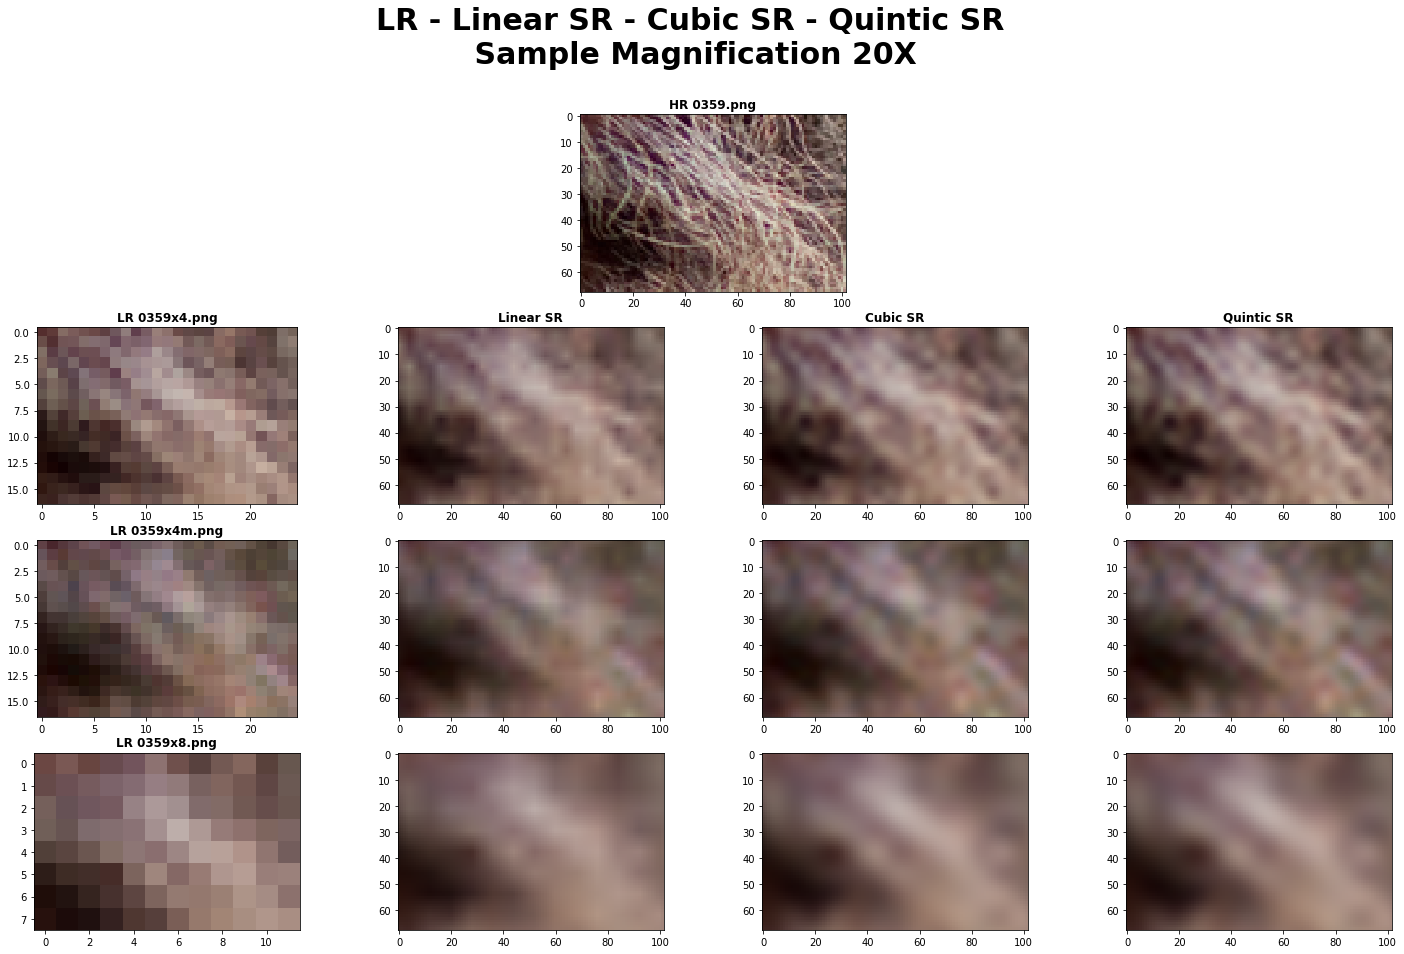

In [0]:
sample_start = 0.60
sample_end = 0.65
magnification = np.round(1 / (sample_end - sample_start))
title = "LR - Linear SR - Cubic SR - Quintic SR\n Sample Magnification %dX"
left = imgs
left_mid = SR_imgs_linear
right_mid = SR_imgs_cubic
right = SR_imgs_quintic

plt.figure(figsize=(25, 15)).suptitle(title % magnification, fontsize=30, fontweight='bold')
ax = plt.subplot(4, 1, 1)
ax.set_title("HR "+sample_index+'.png', fontweight='bold')
plt.imshow(sample_area(imgs[0], sample_start, sample_end))


for i in range(1, 4):
    k = i*4 + 1
    ax = plt.subplot(4, 4, k)
    plt.imshow(sample_area(left[i], sample_start, sample_end))
    ax.set_title("LR " + samples[i].split('/')[-1], fontweight='bold')
    ax = plt.subplot(4, 4, k+1)
    plt.imshow(sample_area(left_mid[i], sample_start, sample_end))
    if i == 1:
        ax.set_title("Linear SR", fontweight="bold")
    ax = plt.subplot(4, 4, k+2)
    plt.imshow(sample_area(right_mid[i], sample_start, sample_end))
    if i == 1:
        ax.set_title("Cubic SR", fontweight="bold")
    ax = plt.subplot(4, 4, k+3)
    plt.imshow(sample_area(right[i], sample_start, sample_end))
    if i == 1:
        ax.set_title("Quintic SR", fontweight="bold")
plt.show()

#### Hide

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


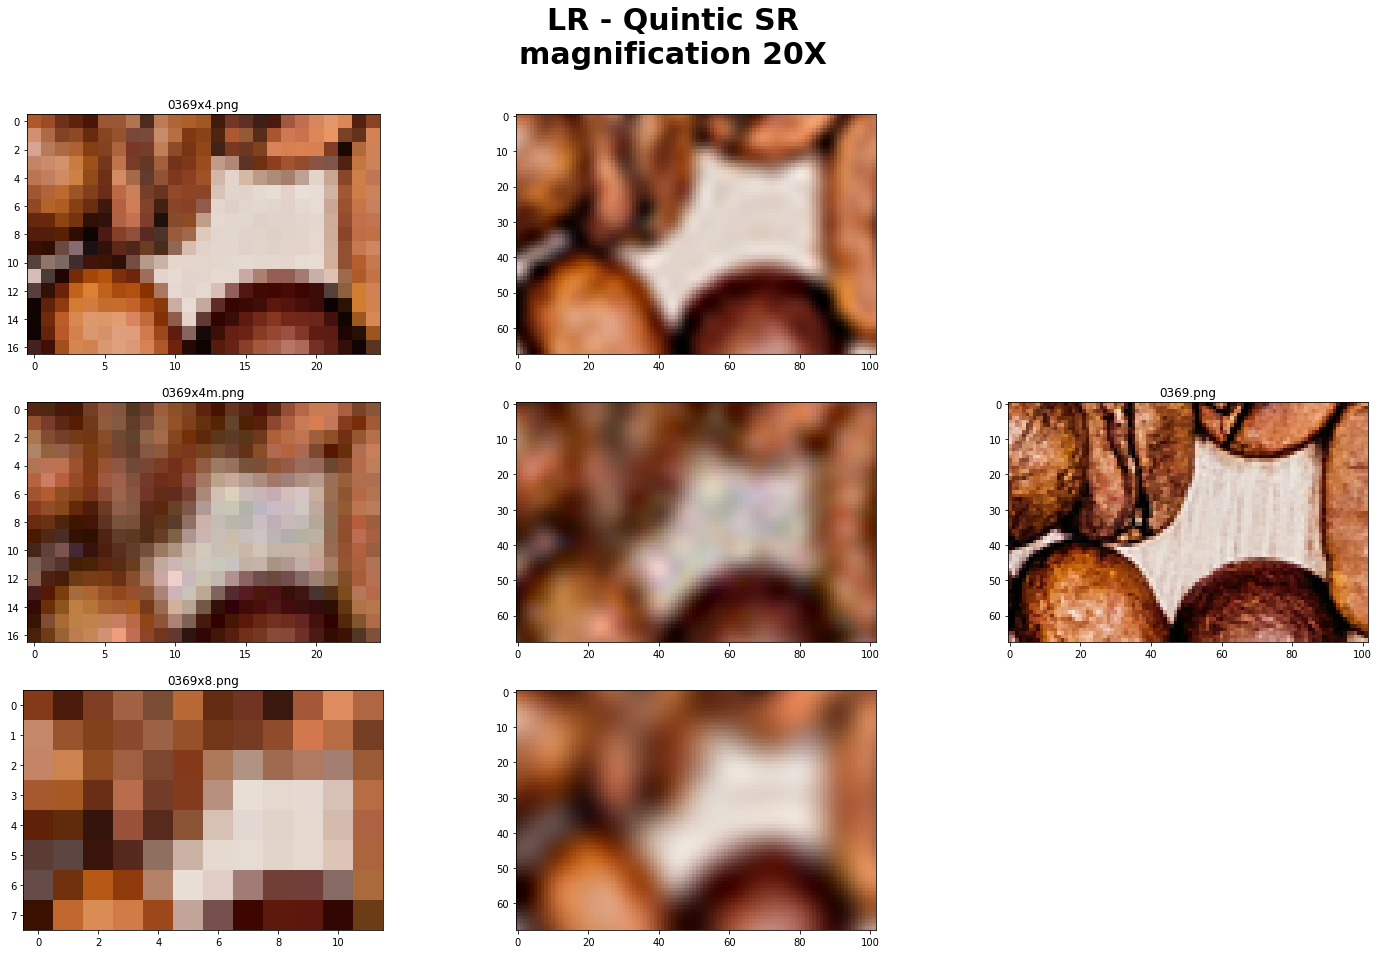

In [0]:
sample_start = 0.60
sample_end = 0.65
magnification = np.round(1 / (sample_end - sample_start))
title = "LR - Quintic SR\nmagnification %dX"
left = imgs
right = SR_imgs_quintic

plt.figure(figsize=(25, 15)).suptitle(title % magnification,fontsize=30, fontweight='bold')
ax = plt.subplot(3, 3, 6)
ax.set_title(sample_index+'.png')
plt.imshow(sample_area(imgs[0], sample_start, sample_end))


for i in range(1, 4):
    k = 1 + (i-1)*3
    ax = plt.subplot(3, 3, k)
    plt.imshow(sample_area(left[i], sample_start, sample_end))
    ax.set_title(samples[i].split('/')[-1])
    ax = plt.subplot(3, 3, k+1)
    plt.imshow(sample_area(right[i], sample_start, sample_end))

plt.show()